In [9]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from pandas.plotting import lag_plot as lg
from statsmodels.tsa.stattools import adfuller 
from sklearn import metrics


import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [15]:
x = pd.read_excel('~/Desktop/FDI.xlsx')
x.columns

Index(['date', ' Inflows'], dtype='object')

In [13]:
fdi_data = pd.read_excel('~/Desktop/FDI.xlsx', index_col = "date")

In [14]:
fdi_data.columns

Index([' Inflows'], dtype='object')

In [212]:
X = fdi_data['Inflows'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -4.880442
p-value: 0.000038
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610
Reject Ho - Time Series is Stationary


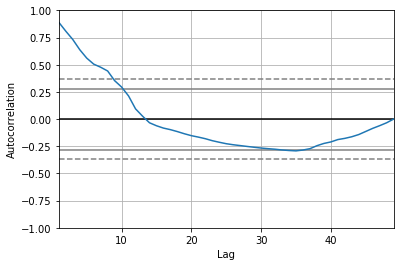

In [153]:
pd.plotting.autocorrelation_plot(fdi_data['Inflows'])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


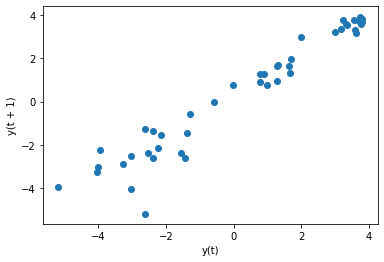

In [155]:
lg(np.log(fdi_data['Inflows']))

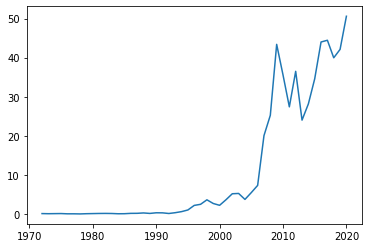

In [156]:
plt.plot(fdi_data['Inflows'])

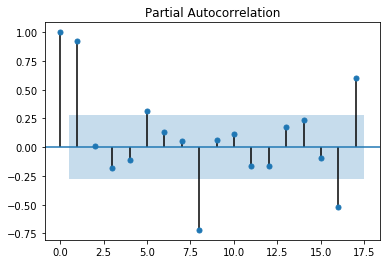

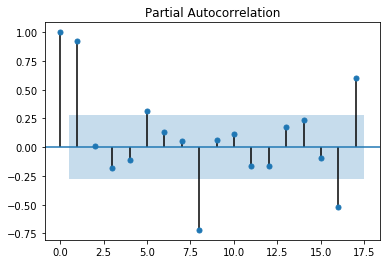

In [141]:
plot_pacf(X)

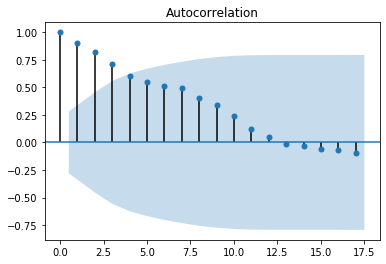

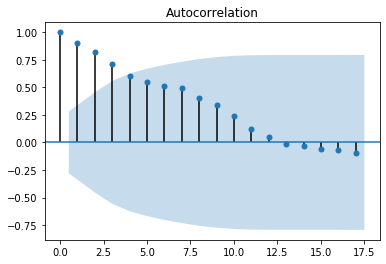

In [144]:
plot_acf(X)

In [90]:
df = fdi_data

In [91]:
df["Values_shifted"]  = df[" Inflows"].shift()

In [92]:
df

,Inflows,Values_shifted
date,,
1970-12-31,0.045460,NaN
1971-12-31,0.047660,0.045460
1972-12-31,0.017790,0.047660
1973-12-31,0.037910,0.017790
1974-12-31,0.056970,0.037910
1975-12-31,-0.010326,0.056970
1976-12-31,-0.007706,-0.010326
1977-12-31,-0.036060,-0.007706
1978-12-31,0.018090,-0.036060


In [93]:
df.dropna(inplace=True)

In [94]:
df.columns
#Removing space from column name
df.columns = df.columns.str.replace(' ', '')

In [95]:
df.columns

Index(['Inflows', 'Values_shifted'], dtype='object')

In [160]:
train_size

39

In [96]:
y = df.Inflows.values
X = df.Values_shifted.values

In [159]:
train_size = int(len(X) * 0.80)

In [98]:
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(X)]

In [99]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [100]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
lr.coef_

array([1.07931221])

In [102]:
lr.intercept_

0.636042014360505

In [103]:
y_pred = lr.predict(X_test)

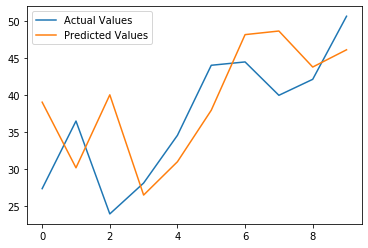

In [213]:
plt.plot(y_test[:], label="Actual Values")
plt.plot(y_pred[:], label="Predicted Values")
plt.legend()
plt.show()

In [133]:
model = ARIMA(y_train, order=(1,0,0))

In [134]:
model_fit = model.fit()

In [135]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   39
Model:                     ARMA(1, 0)   Log Likelihood                -110.262
Method:                       css-mle   S.D. of innovations              3.949
Date:                Sun, 07 Mar 2021   AIC                            226.524
Time:                        12:33:51   BIC                            231.515
Sample:                             0   HQIC                           228.315
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3917     12.544      0.988      0.323     -12.194      36.978
ar.L1.y        0.9665      0.037     25.818      0.000       0.893       1.040
                                    Roots           

In [136]:
print ("Mean absolute error:", metrics.mean_absolute_error(y_test,y_pred))
print ("Mean squared error:", metrics.mean_squared_error(y_test,y_pred))
print ("RootMean absolute error:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error: 6.369977949085433
Mean squared error: 59.570680862149516
RootMean absolute error: 7.7182045102568715


In [137]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.11142369352669479

In [129]:
def MAPE(y_test,y_pred):
    mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
    return mape

In [130]:
LR_MAPE= MAPE(y_test,y_pred)
print("MAPE: ",LR_MAPE)

MAPE:  19.912147355602826


In [112]:
y_test

array([27.39688503, 36.4986546 , 23.99568501, 28.15303127, 34.57664369,
       44.00949213, 44.45857155, 39.96609136, 42.11745074, 50.61064735])

In [113]:
y_pred

array([39.03945221, 30.2058345 , 40.02948551, 26.5348778 , 31.02195237,
       37.95503568, 48.13602415, 48.62072105, 43.77193234, 46.09392078])

In [199]:
predictions = model_fit.forecast(steps=5)[0]
predictions

array([34.80343812, 34.05160041, 33.32498432, 32.62274376, 31.944061  ])

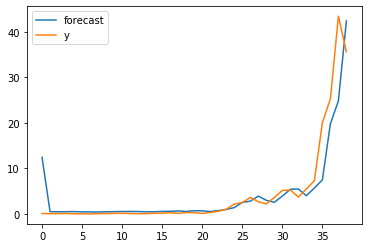

In [208]:
model_fit.plot_predict(dynamic=False)
plt.show()

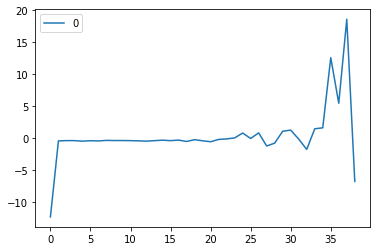

In [209]:
# Since the residual line is linear without much trend or pattern, model is good. 
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
residuals.plot(label = 'residuals')


In [202]:
residuals

,0
0,-12.344059
1,-0.443972
2,-0.394984
3,-0.395369
4,-0.481086
5,-0.413427
6,-0.444313
7,-0.362760
8,-0.384614
9,-0.383481


In [121]:
# Since mean is close to zero, hence the model is good
residuals.describe()

,0
count,39.000000
mean,0.305900
std,4.433228
min,-12.344059
25%,-0.444142
50%,-0.384614
75%,-0.017848
max,18.609142


In [227]:
len(y)

49

In [1]:
import fbprophet


ModuleNotFoundError: No module named 'fbprophet'